<a href="https://colab.research.google.com/github/seoyeon7/ECG_Data_Analysis/blob/main/ECG_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
df=pd.read_csv("/content/drive/MyDrive/weka/dataset/20221115_Person_02_rec_5.csv", skiprows=[1,2])

In [45]:
df.head()

,row_num,_id,db_id,rcrd_id,signal
0,0.0,602b9b8dfdea802a39ce8445,ecgiddb,Person_02/rec_5,"[-0.035, -0.01]"
1,1.0,602b9b8dfdea802a39ce8446,ecgiddb,Person_02/rec_5,"[0.025, -0.01]"
2,2.0,602b9b9dfdea802a39ce8447,ecgiddb,Person_02/rec_5,"[0.065, -0.015]"
3,3.0,602b9b9dfdea802a39ce8448,ecgiddb,Person_02/rec_5,"[0.035, -0.03]"
4,4.0,602b9b9dfdea802a39ce8449,ecgiddb,Person_02/rec_5,"[-0.05, -0.045]"


In [46]:
stripdata=df['signal'].str.strip("[")
stripdata=stripdata.str.strip("]")
data = stripdata.str.split(',', expand=True)

data_num=df['row_num']
dataset=pd.concat([data_num, data], axis=1)

dataset["label"] = df['rcrd_id'].str[:9]

dataset.columns = ['row_num', 'before', 'after', 'label']

dataset

,row_num,before,after,label
0,0.0,-0.035,-0.01,Person_02
1,1.0,0.025,-0.01,Person_02
2,2.0,0.065,-0.015,Person_02
3,3.0,0.035,-0.03,Person_02
4,4.0,-0.05,-0.045,Person_02
...,...,...,...,...
9995,9995.0,0.07,-0.02,Person_02
9996,9996.0,0.005,-0.02,Person_02
9997,9997.0,-0.075,-0.02,Person_02
9998,9998.0,-0.17,-0.025,Person_02


In [47]:
dataset.dtypes

row_num    float64
before      object
after       object
label       object
dtype: object

In [48]:
# 데이터 자료형 변경

dataset["after"]=dataset["after"].astype('float')
dataset["before"]=dataset["before"].astype('float')

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   row_num  10000 non-null  float64
 1   before   10000 non-null  float64
 2   after    10000 non-null  float64
 3   label    10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


In [50]:
# 결측치 확인

dataset.isnull().sum()

row_num    0
before     0
after      0
label      0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


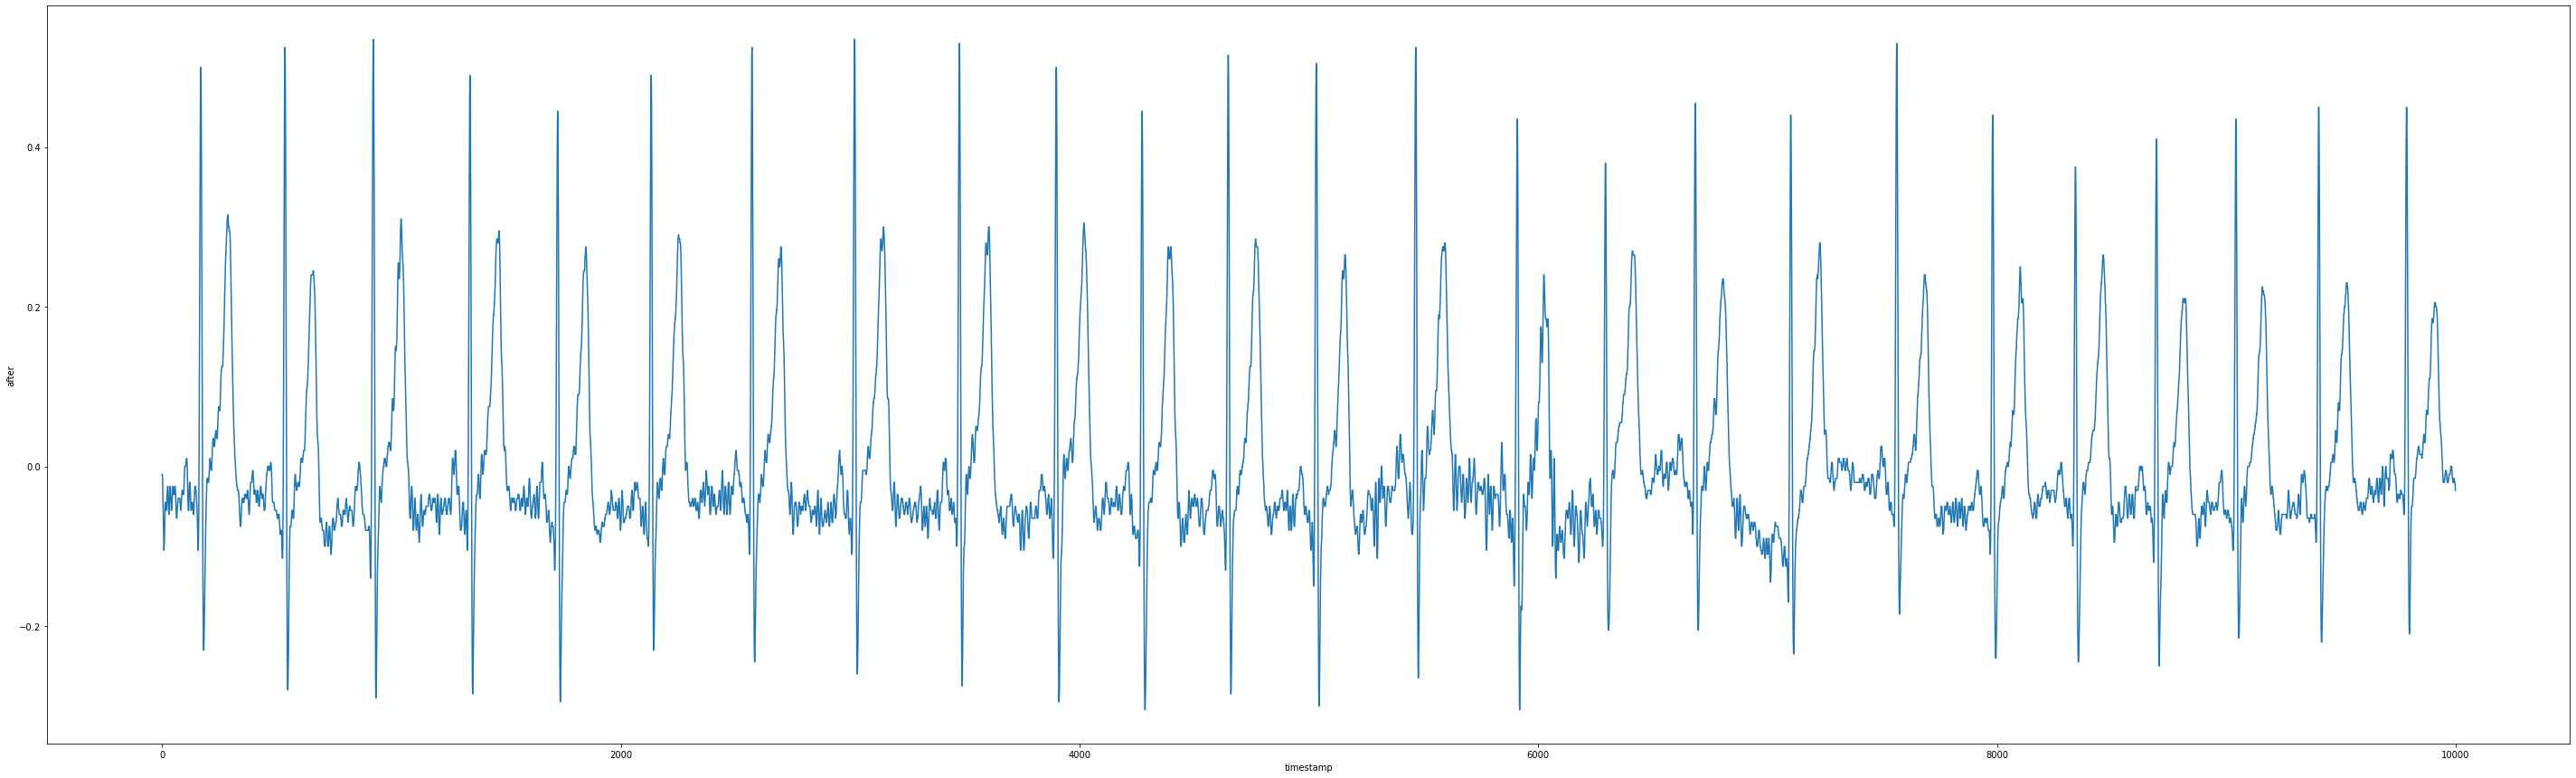

In [51]:
# 데이터 시각화

fig, ax = plt.subplots(ncols=1)
sns.lineplot("row_num", "after", data=dataset)
plt.ylabel("after")
plt.xlabel("timestamp")
plt.gcf().set_size_inches(50, 15)

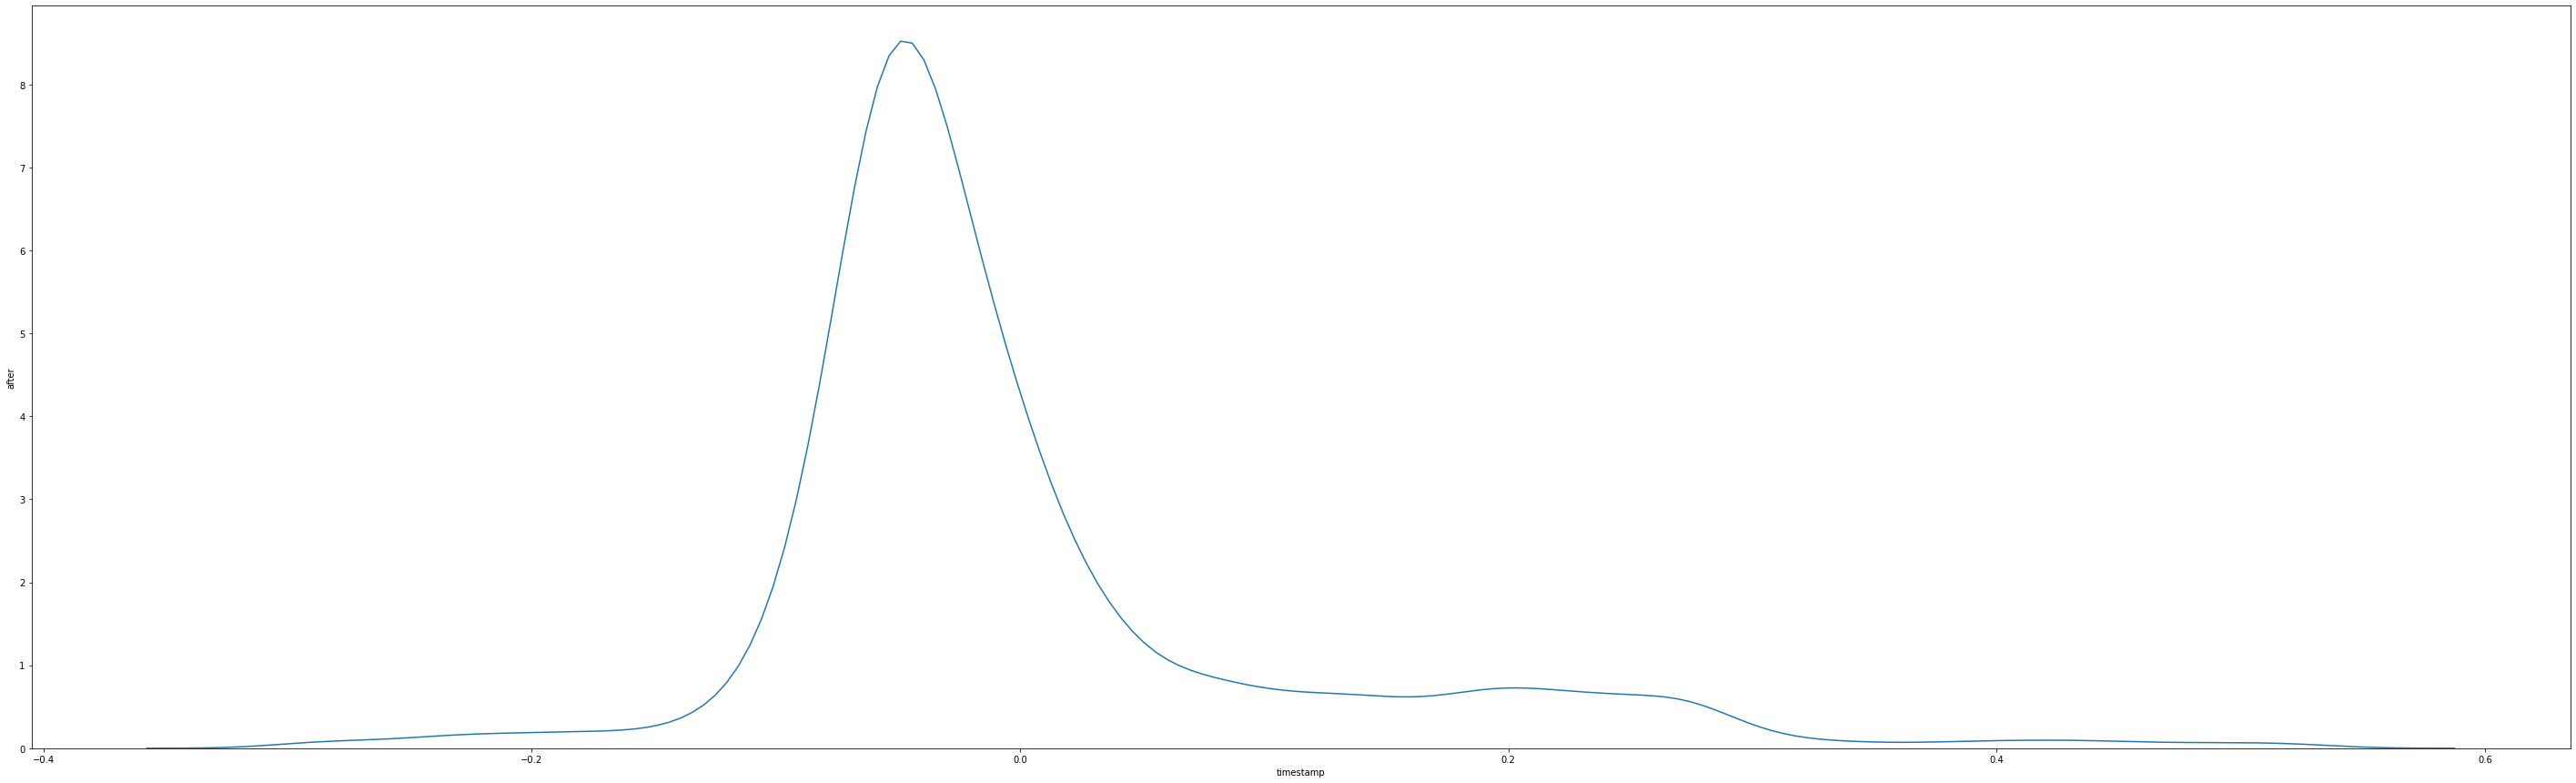

In [65]:
# 데이터 시각화

sns.kdeplot(x="after",  data=dataset)
plt.ylabel("after")
plt.xlabel("timestamp")
plt.gcf().set_size_inches(50, 15)